# Tarea 2 Aprendizaje Profundo
Alumno: Diego Iruretagoyena


---
**Fuentes**

Para responder esta tarea usé:


-> Hice el curso de Coursera "Deep Learning with PyTorch : Generative Adversarial Network" 
https://www.coursera.org/account/accomplishments/certificate/ZACRDSMA6WN3

https://github.com/C0sch0/PyTorch_GAN_DL_MNIST

-> Hice la Semana 4 del curso Coursera "Introduction to Machine Learning
by Duke University" para aprender sobre Embeddings, RNN, LSTM en detalle y aplicar esas estructuras a NLP. 
https://www.coursera.org/learn/machine-learning-duke/home/week/4

-> Pyrotch RNN en Youtube - 
https://www.youtube.com/watch?v=Gl2WXLIMvKA&t=286s 
https://github.com/aladdinpersson/Machine-Learning-Collection/blob/master/ML/Pytorch/Basics/pytorch_rnn_gru_lstm.py

-> Clases Aprendizaje Profundo IIC3, profesor Alvaro Soto

-> Ayudantías T02 Ayudante Alberto Valdés

-> Understanding LSTM Networks 
https://colah.github.io/posts/2015-08-Understanding-LSTMs/


-> The Unreasonable Effectiveness of Recurrent Neural Networks
http://karpathy.github.io/2015/05/21/rnn-effectiveness/

---


# Parte 1

En esta tarea desarrollaremos la idea de poder crear un modelo que reconozca entre frases Spam y No Spam.

Para esto, utilizamos conceptos de NLP como creación de embeddings a partir de frases y la utilización de modelos como RNN, GRU, LSTM, bi-LSTM para la tarea de clasificación. Luego presentamos métricas sobre los resultados.

# Embeddings

Las palabras son comportamientos de fenómenos y no son números. Necesitamos una forma de mapear estas palabras/letras a números con los que podamos analizar. Esta idea de mapear Palabras a Vec se llama Word2Vec. Cada uno de estos vectores se llama a menudo "embedding" ("incrustación").

La idea de mapear cada palabra a un vector está ligada a mapear cada palabra a una incrustación. La idea es incrustar la palabra en un nuevo espacio de características.

w(i) = i-ésima palabra del vocabulario. La idea de esta incrustación de palabras es que tomaremos cada letra en un vector de tamaño m. m puede ser 100, 200, depende. La idea clave es que asignaremos cada palabra a un vector de m dimensiones. La dimensionalidad depende del problema particular que elijamos.

imagen

Después de hacer este aprendizaje, aprendemos un libro de códigos de vocabulario. M-dimensional.

Así, cada vector c(i) se asocia con la ith palabra w(i). Deseamos que dos palabras similares estén muy cerca una de la otra Aprenderemos los vectores basándonos en un gran corpus de texto. Una vez hecho el mapeo, estamos listos para empezar a aplicar nuestros modelos. Hay múltiples formas de crear estas incrustaciones.



# Redes neuronales recurrentes
Los seres humanos no empiezan su pensamiento desde cero cada segundo. Mientras lees esta redacción, comprendes cada palabra basándote en tu comprensión de las palabras anteriores. No tiras todo a la basura y empiezas a pensar desde cero otra vez. Tus pensamientos tienen persistencia.

Las redes neuronales tradicionales no pueden hacer esto, y parece un gran defecto. Por ejemplo, imagina que quieres clasificar qué tipo de evento está ocurriendo en cada momento de una película. No está claro cómo una red neuronal tradicional podría utilizar su razonamiento sobre los acontecimientos anteriores de la película para informar sobre los posteriores. Las redes neuronales recurrentes abordan este problema. Son redes con bucles que permiten que la información persista.

Funciona al tomar el vector. asociado con la n-1 palabra y el vector oculto asociado con la palabra w_{n-1}, h_{n-1}

Se concatenan los vectores, creando X_{n-1}. Esto es enviado al modelo para el vector oculto h_n, set de pesos W multiplicados por el input X_{n-1}. Se agrega el bias más la ponderación de cada input, para luego ser enviado a una función no linear.

El proceso de sumar los resultados de ponderar el input y agregar el bias es llamado Softmax, el cual mapea el vector a las probabilidades de clase.


# LSTM

La RNN es una extensión natural del MLP. Es una repetición del perceptrón multicapa básico. Sin embargo, se ha descubierto que las RNN no son tan eficaces como nos gustaría. Introduciremos una forma más complicada que se basará en el concepto de MLP pero de una forma mucho más sofisticada. La memoria a largo plazo. LSTM representa el estado del arte en el Procesamiento del Lenguaje Natural. La metodología es la comprensión del trabajo. Esta tecnología es lo que está impulsando la reciente revolución en NLP.

La LSTM se utiliza para modelar secuencias de datos. El lenguaje es natural para el LSTM, ya que el lenguaje es una secuencia de palabras. Aquí, representamos las palabras como vectores y operamos el LSTM sobre la secuencia de vectores de los documentos. LSTM es el estado del arte, obteniendo un rendimiento récord.. Se compone de 3 redes neuronales de control que tienen vectores de salida Fn, in, y on. Cada nn tiene la misma forma de un MLP. La función no lineal para cada una de estas unidades de control es una función sigmoidea sigma, lo que significa que cada uno de los componentes son números entre 0 y 1.

En la LSTM introducimos un nuevo vector, una célula de memoria, que se representa por C. La célula de memoria se actualiza mediante una cuarta red neuronal que tiene una función no lineal correspondiente a la tangente hiperbólica. De nuevo un perceptrón multicapa, pero entonces la función no lineal es una tangente hiperbólica, lo que significa que c hasta n tiene componentes o tiene elementos en el vector c hasta n que son cada uno un número entre menos uno y uno. 

Estos cuatro nns del bloque superior se utilizan entonces para actualizar la celda de memoria Cn y para actualizar también la variable oculta Hn. Lo hacemos tomando las salidas de control para operar en la celda de memoria anterior y nuestra nueva estimación. La salida de eso es entonces enviada a una tangente hiperbólica y es operada por la salida del newtork con.

Todos los parámetros del LSTM pueden ser aprendidos usando datos no etiquetados. Los vectores de palabras pueden ser tratados como params adicionales, y aprendidos también. Permite la incrustación de vectores de palabras y la síntesis de texto. Esta capacidad de sintetizar texto es crítica para diferentes casos de uso, por ejemplo, la traducción. LSTM sintetiza textos de forma muy eficaz. h_0 y c_0 deben inicializarse en función de la tarea de aprendizaje.





# Set up

In [ ]:
import re
import nltk
import time
import math
import torch
import torchtext
import numpy as np
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns
import torch.nn as nn
nltk.download('stopwords')
import matplotlib.pyplot as plt
from torchtext.vocab import GloVe
from nltk.corpus import stopwords
from torchtext import data, datasets
from collections import defaultdict, Counter
from torch.utils.data import DataLoader, TensorDataset
pd.options.mode.chained_assignment = None 


from google.colab import drive
drive.mount('/content/drive')

# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")    
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")


import gensim.downloader
import gensim
from gensim.models import word2vec
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity

from gensim.test.utils import common_texts
from gensim.models import Word2Vec


!pip3 install --upgrade gensim --user


#_glove_vectors = gensim.downloader.load('/content/drive/MyDrive/HW2DL/word2vec-google-news-300.model')

W2V_model = KeyedVectors.load('/content/drive/MyDrive/HW2DL/word2vec-google-news-300.model', mmap='r')
if not W2V_model:
  print("Downloading")
  W2V_model = gensim.downloader.load('word2vec-google-news-300')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
GPU is available
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
gpu = GPUs[0] # Only one GPU on Colab and isn’t guaranteed

def printm():
  process = psutil.Process(os.getpid())
  print("Gen RAM Free:", humanize.naturalsize(psutil.virtual_memory().available ), "I Proc size: ", humanize.naturalsize( process.memory_info().rss))
  print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))


printm()

# **Actividad 1**

Normalmente, se mide la distancia entre dos vectores de word2vec utilizando la distancia coseno (véase similitud coseno), que mide el ángulo entre los vectores. En cambio, WMD utiliza la distancia euclidiana. La distancia euclidiana entre dos vectores puede ser grande porque sus longitudes difieren, pero la distancia coseno es pequeña porque el ángulo entre ellos es pequeño; podemos mitigar algo de esto normalizando los vectores.



La magnitud de un vector de palabras es menos importante que su dirección; se puede considerar que la magnitud representa la frecuencia de uso, independientemente de la semántica de la palabra. Aquí nos interesa la semántica, así que normalizamos nuestros vectores, dividiendo cada uno por su longitud. El resultado es que todos nuestros vectores de palabras tienen una longitud de 1, y como tal, se encuentran en un círculo unitario. El producto punto de dos vectores es proporcional al coseno del ángulo entre ellos, y proporciona una medida de similitud (cuanto mayor sea el coseno, menor será el ángulo).

Traducción realizada con la versión gratuita del traductor www.DeepL.com/Translator

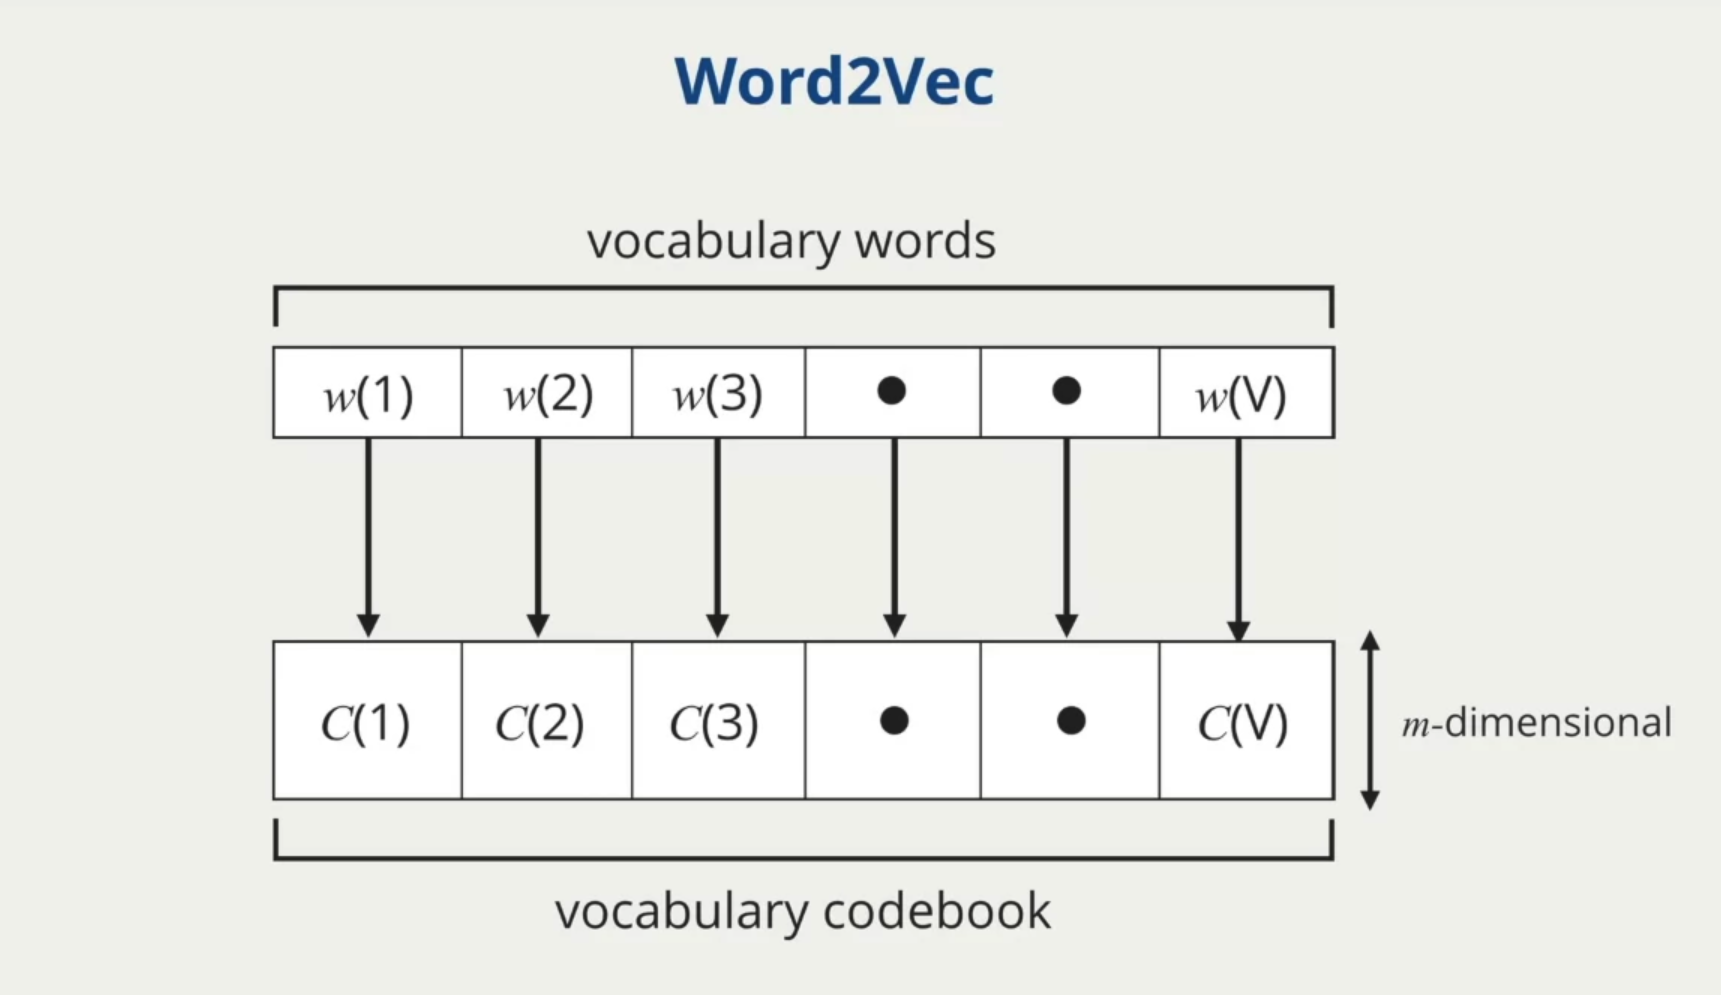

In [13]:
from IPython.display import Image
Image('./images/CodeBook.png')


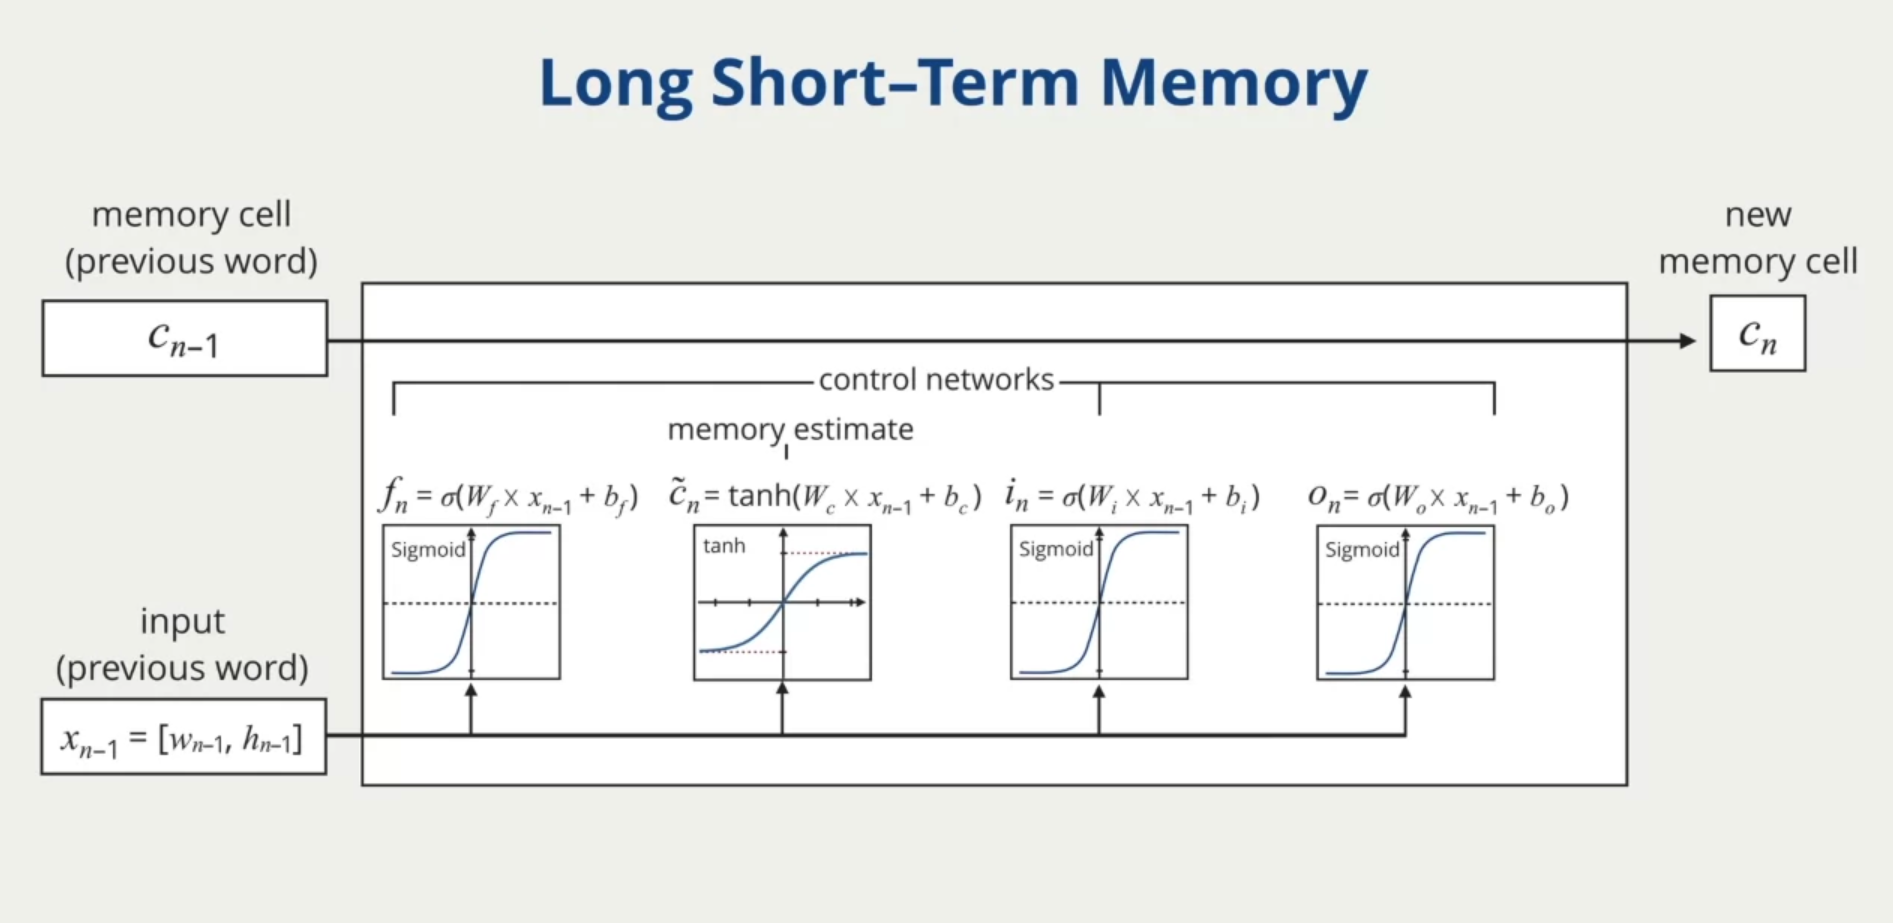

In [12]:

from IPython.display import Image
Image('images/LSTM.png')


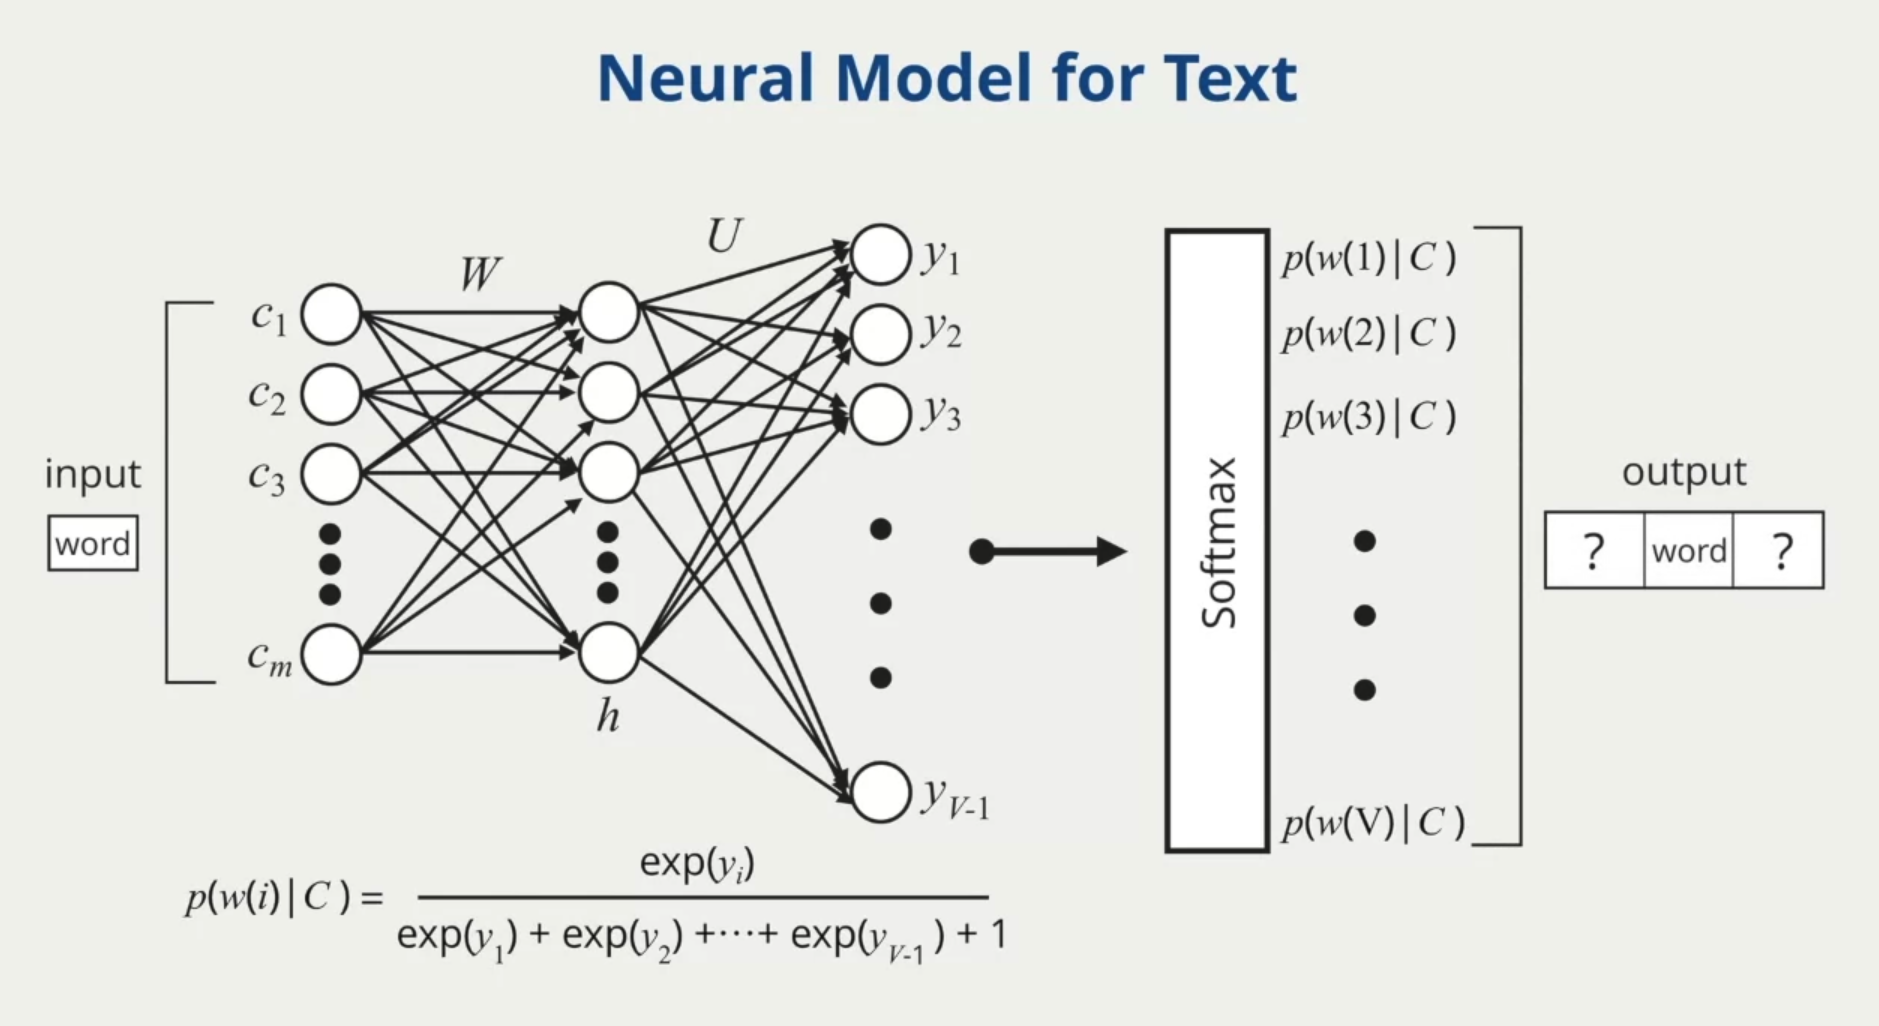

In [14]:

from IPython.display import Image
Image('images/NNText.png')


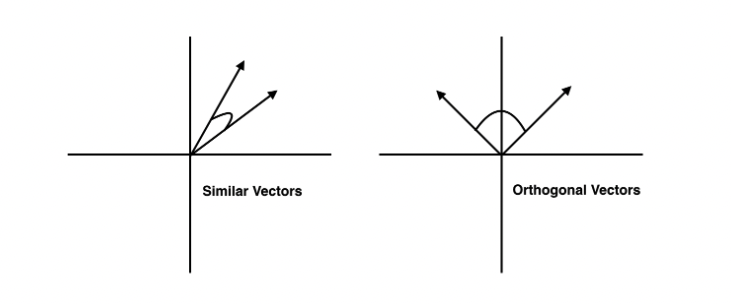

In [10]:


from IPython.display import Image
Image('images/VectoresSimilares.png')


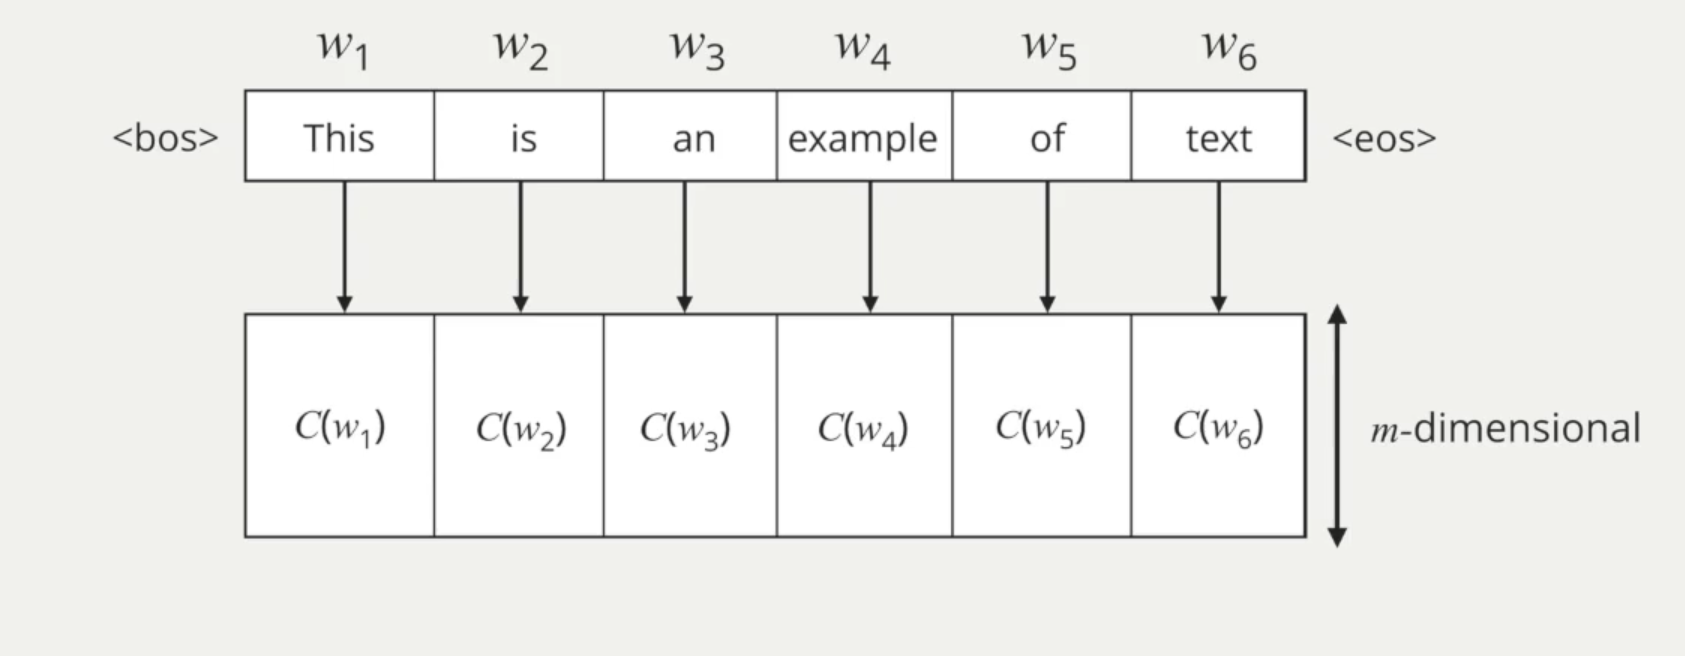

In [9]:


from IPython.display import Image
Image('images/vocabularyCodeBook.png')


In [1]:
!mkdir images

In [ ]:
_words = ["king", "queen", "ball"]

for _word in _words:
  _word_vector = W2V_model[_word]
  print("embedding for ", _word)
  print("size of embedding: ", len(_word_vector))
  print("-"*50)
  print(_word_vector, "\n")

In [ ]:
for i in _words:
  print("\n")
  for j in reversed(_words):
    cosine_dist = W2V_model.distance(i, j) 
    euclidean_dist = euc_dist = np.linalg.norm(W2V_model[i] - W2V_model[j])
    print("Distance between   ", i, "|", j)
    print("Cosine: ", cosine_dist, "\nEuclidean: ", euclidean_dist, "\n")


Veamos una visualización para entender que significan estas distancias.
Usaremos un modelo TSNE y plotearemos los puntos


Primero veamos 300 palabras presentes en el vocabulario.


In [ ]:
from sklearn.manifold import TSNE
%matplotlib inline

def tsne_plot(model):
  "Creates and TSNE model and plots it"
  labels = []
  tokens = []
  _typee = str(type(model))

  if "KeyedVectors" in _typee:
    for word in list(model.index_to_key):
      tokens.append(model[word])
      labels.append(word)

      if len(tokens) > 300:
        break

  tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
  new_values = tsne_model.fit_transform(tokens)

  x = []
  y = []
  for value in new_values:
      x.append(value[0])
      y.append(value[1])
      
  plt.figure(figsize=(16, 16)) 
  for i in range(len(x)):
      plt.scatter(x[i],y[i])
      plt.annotate(labels[i],
                    xy=(x[i], y[i]),
                    xytext=(5, 2),
                    textcoords='offset points',
                    ha='right',
                    va='bottom')
  plt.show()

tsne_plot(model)

Ahora "king", "queen" y "ball" y sus palabras similares

In [ ]:
from sklearn.manifold import TSNE
%matplotlib inline

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in _words:
        tokens.append(model[word])
        labels.append(word)

        if len(tokens) > 300:
          break
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(model)

Veamos palabras similares en el gráfico

In [ ]:
for _word in _words:
  print(W2V_model.most_similar(_word))

In [ ]:
from sklearn.manifold import TSNE
%matplotlib inline

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []


    closest = model.most_similar("queen")
    print(closest)
    for tuple_ in closest:
      __word = tuple_[0]
      tokens.append(model[__word])
      labels.append(__word)

      if len(tokens) > 300:
        break
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(model)

 ¿Tienen sentido?. Para explicar sus resultados una buena idea es analizar matema ́ti- camente la distancia euclidiana y la similitud de coseno, y revisar que indican valores bajos y altos de cada una de estas m ́etricas.



 
Both cosine similarity and Euclidean distance are methods for measuring the proximity between vectors in a vector space. It’s important that we, therefore, define what do we mean by the distance between two vectors, because as we’ll soon see this isn’t exactly obvious.


Vectors whose Euclidean distance is small have a similar “richness” to them; while vectors whose cosine similarity is high look like scaled-up versions of one another.


# Actividad 2

Para transformar una oracion en un vector de dimension 300, tome cada palabra de la oraci ́on y calcule con la ayuda del embedding su representacio ́n vectorial. 

Luego de esto, calcule el promedio de estos vectores componente a componente, lo que le dar ́a como resultado un vector de dimensi ́on 300. Este es el vector (embedding) correspondiente a la oraci ́on.
Teniendo esto en cuenta, cree los sets de training, validation y test.



Test balanceado i.e. la distribución de las clases debe mantenerse en las muestras para set de train, test y val.

In [ ]:
def get_mean_vector(words):
  # Handle empty ones
  valid = []

  for _word in words:
    try:
      _vector = W2V_model[_word]
      valid.append(_vector)
    except:
      _vector = np.zeros(300)
      valid.append(_vector)
  
  if len(valid) >= 1:
      return np.mean(valid, axis=0)

  else:
      return np.zeros(300)


In [ ]:
plain_text = "Its dangerous to go alone Take this Its a secret to everybody Grumble Grumble Dodongo Dislikes Smoke Hey Listen"
plain_text_no_spaces = plain_text.lower().split()
print(plain_text_no_spaces)

mean_vector = get_mean_vector(plain_text_no_spaces)
print("size", len(mean_vector))
print(mean_vector)


['its', 'dangerous', 'to', 'go', 'alone', 'take', 'this', 'its', 'a', 'secret', 'to', 'everybody', 'grumble', 'grumble', 'dodongo', 'dislikes', 'smoke', 'hey', 'listen']
size 300
[ 0.04865787  0.02505654  0.03553852  0.10970106 -0.08812192 -0.01562179
  0.03757196 -0.04190867  0.05398881  0.07464208 -0.06654438 -0.07063374
  0.03379099 -0.0012207  -0.12271439  0.0840181   0.10899915  0.04340724
  0.03820158 -0.0614608  -0.07549728  0.05103824  0.01945415  0.00904605
  0.05553436  0.01288484  0.01399954  0.00066336 -0.01787848 -0.0301867
 -0.0187924   0.01340846 -0.08647718 -0.03448506  0.04839646 -0.08915992
  0.05803229 -0.01402363  0.01752351  0.0610721   0.07733154 -0.11315677
  0.1087518  -0.01529573 -0.05909488 -0.01380117 -0.11972046  0.02934827
 -0.04902328  0.02143699 -0.03758481  0.0547903   0.03808594  0.00683493
 -0.00264218 -0.01442437 -0.05051583 -0.07716932  0.06632273 -0.01468699
  0.02247861  0.07275872 -0.03664519 -0.03865132  0.02806653 -0.08992727
 -0.04857756  0.047

Ahora crearemos las particiones del dataset

In [ ]:
SPAM_MSGS_path = '/content/drive/MyDrive/HW2DL/Tarea_2_DL_2022_1/Redes Neuronales Recurrentes (Parte 1)/SMSSpamCollection'
with open(SPAM_MSGS_path) as file:
  data = file.readlines()
  
len(data) # Vemos cuantos mensajes hay

df = pd.DataFrame(data=data).T
df.head()

,0,1,2,3,4,5,6,7,8,9,...,5564,5565,5566,5567,5568,5569,5570,5571,5572,5573
0,"ham\tGo until jurong point, crazy.. Available ...",ham\tOk lar... Joking wif u oni...\n,spam\tFree entry in 2 a wkly comp to win FA Cu...,ham\tU dun say so early hor... U c already the...,"ham\tNah I don't think he goes to usf, he live...",spam\tFreeMsg Hey there darling it's been 3 we...,ham\tEven my brother is not like to speak with...,ham\tAs per your request 'Melle Melle (Oru Min...,spam\tWINNER!! As a valued network customer yo...,spam\tHad your mobile 11 months or more? U R e...,...,ham\tOk lor... Sony ericsson salesman... I ask...,ham\tArd 6 like dat lor.\n,ham\tWhy don't you wait 'til at least wednesda...,ham\tHuh y lei...\n,spam\tREMINDER FROM O2: To get 2.50 pounds fre...,spam\tThis is the 2nd time we have tried 2 con...,ham\tWill ü b going to esplanade fr home?\n,"ham\tPity, * was in mood for that. So...any ot...",ham\tThe guy did some bitching but I acted lik...,ham\tRofl. Its true to its name\n


## Limpiar mensajes, taggear segun spam o no spam

In [ ]:
import re 

SPAM = []
not_SPAM = []

for _msg in data:
  tag, _msg = _msg.strip().split('\t')

  # Limpiar string
  _msg = re.sub('[^A-Za-z0-9]+', ' ', _msg)
  # print(_msg)
  
  if tag == "spam":
    SPAM.append([_msg, tag])

  elif tag == "ham":
    not_SPAM.append([_msg, tag])

  else:
    print("ERROR - UNKNOWN MESSAGE")




In [ ]:
no_SPAM_df = pd.DataFrame(data=not_SPAM, columns=["message", "label"])
no_SPAM_df.index = no_SPAM_df.index + 1
no_SPAM_df.head()

,message,label
1,Go until jurong point crazy Available only in ...,ham
2,Ok lar Joking wif u oni,ham
3,U dun say so early hor U c already then say,ham
4,Nah I don t think he goes to usf he lives arou...,ham
5,Even my brother is not like to speak with me T...,ham


In [ ]:
SPAM_df = pd.DataFrame(data=SPAM, columns=["message", "label"])
SPAM_df.index = SPAM_df.index + 1
SPAM_df.head()

,message,label
1,Free entry in 2 a wkly comp to win FA Cup fina...,spam
2,FreeMsg Hey there darling it s been 3 week s n...,spam
3,WINNER As a valued network customer you have b...,spam
4,Had your mobile 11 months or more U R entitled...,spam
5,SIX chances to win CASH From 100 to 20 000 pou...,spam


In [ ]:
len_spam = len(SPAM_df)
len_not_spam = len(no_SPAM_df)

print("How many spam messages ? -----", len_spam)
print("How many non spam messages ? -----", len_not_spam)
print("Meaning every 1 spam we have", len_not_spam // len_spam, "non spams")

How many spam messages ? ----- 747
How many non spam messages ? ----- 4827
Meaning every 1 spam we have 6 non spams


In [ ]:
print("How many spam messages ? -----", len(SPAM))
print("How many non spam messages ? -----", len(not_SPAM))

How many spam messages ? ----- 747
How many non spam messages ? ----- 4827


In [ ]:
SPAM_df.tail()

,message,label
743,Want explicit SEX in 30 secs Ring 02073162414 ...,spam
744,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,spam
745,Had your contract mobile 11 Mnths Latest Motor...,spam
746,REMINDER FROM O2 To get 2 50 pounds free call ...,spam
747,This is the 2nd time we have tried 2 contact u...,spam


Creamos los embeddings para cada frase y separamos en 

## split train (70%) val (20%) test (10%)

In [ ]:
SPAM_train_df = SPAM_df[0:523]
SPAM_val_df = SPAM_df[523:672]
SPAM_test_df = SPAM_df[672:]


l_train_sp = len(SPAM_train_df)
l_val_sp = len(SPAM_val_df)
l_test_sp = len(SPAM_test_df)
print("SPAM dbs sizes \ntrain: {0}, val: {1}, test: {2}".format(l_train_sp,
                                                                l_val_sp,
                                                                l_test_sp
                                                                ))

NOT_SPAM_train_df = no_SPAM_df[:3378]
NOT_SPAM_val_df = no_SPAM_df[3378:4344]
NOT_SPAM_test_df = no_SPAM_df[4344:]

l_train_ns = len(NOT_SPAM_train_df)
l_val_ns = len(NOT_SPAM_val_df)
l_test_ns = len(NOT_SPAM_test_df)

print("NOT SPAM dbs sizes \ntrain: {0}, val: {1}, test: {2}".format(l_train_ns,
                                                                l_val_ns,
                                                                l_test_ns
                                                                ))

SPAM dbs sizes 
train: 523, val: 149, test: 75
NOT SPAM dbs sizes 
train: 3378, val: 966, test: 483


In [ ]:
TRAIN_DB = pd.concat([SPAM_train_df, NOT_SPAM_train_df], ignore_index=True)
VAL_DB = pd.concat([SPAM_val_df, NOT_SPAM_val_df], ignore_index=True)
TEST_DB = pd.concat([SPAM_test_df, NOT_SPAM_test_df], ignore_index=True)



In [ ]:
TRAIN_DB_VECTORIAL = TRAIN_DB
VAL_DB_VECTORIAL = VAL_DB
TEST_DB_VECTORIAL = TEST_DB

Finalmente crear el embedding promedio de cada frase en cada db. Luego de esto estamos listos con el preprocesamiento de nuestra data y podemos proceder a los modelos

In [ ]:
TRAIN_DB_VECTORIAL['message'] = TRAIN_DB_VECTORIAL['message'].apply(get_mean_vector)


In [ ]:
TRAIN_DB_VECTORIAL.head()

In [ ]:
TRAIN_DB_VECTORIAL.to_pickle("/content/drive/MyDrive/HW2DL/Tarea_2_DL_2022_1/Redes Neuronales Recurrentes (Parte 1)/TRAIN_DB_VECTORIAL.pkl")


In [ ]:
TEST_DB_VECTORIAL['message'] = TEST_DB_VECTORIAL['message'].apply(get_mean_vector)
VAL_DB_VECTORIAL['message'] = VAL_DB_VECTORIAL['message'].apply(get_mean_vector)

In [ ]:
TEST_DB_VECTORIAL.head()

In [ ]:
VAL_DB_VECTORIAL.head()

## Save pickle

In [ ]:
VAL_DB_VECTORIAL.to_pickle("/content/drive/MyDrive/HW2DL/Tarea_2_DL_2022_1/Redes Neuronales Recurrentes (Parte 1)/VAL_DB_VECTORIAL.pkl")
TEST_DB_VECTORIAL.to_pickle("/content/drive/MyDrive/HW2DL/Tarea_2_DL_2022_1/Redes Neuronales Recurrentes (Parte 1)/TEST_DB_VECTORIAL.pkl")

## Read pickled data
Partir aquí para saltarse el proceso de armas DBs

In [ ]:
read_TEST_DB_VECTORIAL = pd.read_pickle("/content/drive/MyDrive/HW2DL/Tarea_2_DL_2022_1/Redes Neuronales Recurrentes (Parte 1)/TEST_DB_VECTORIAL.pkl")
read_TRAIN_DB_VECTORIAL = pd.read_pickle("/content/drive/MyDrive/HW2DL/Tarea_2_DL_2022_1/Redes Neuronales Recurrentes (Parte 1)/TRAIN_DB_VECTORIAL.pkl")
read_VAL_DB_VECTORIAL = pd.read_pickle("/content/drive/MyDrive/HW2DL/Tarea_2_DL_2022_1/Redes Neuronales Recurrentes (Parte 1)/VAL_DB_VECTORIAL.pkl")

print("TRAIN")
print(read_TRAIN_DB_VECTORIAL.head())
print(len(read_TRAIN_DB_VECTORIAL), "\n")

print("TEST")
print(read_TEST_DB_VECTORIAL.head())
print(len(read_TEST_DB_VECTORIAL), "\n")

print("VAL")
print(read_VAL_DB_VECTORIAL.head())
print(len(read_VAL_DB_VECTORIAL))

TRAIN
                                             message label
0  [-0.07759074421672078, 0.048100459111201296, 0...  spam
1  [-0.10761228749449823, 0.06816015109209947, 0....  spam
2  [-0.078173100553601, 0.06332680405370447, 0.01...  spam
3  [-0.10509731895045231, 0.08301504034745066, -0...  spam
4  [-0.06532968374399038, 0.043336134690504804, 0...  spam
3901 

TEST
                                             message label
0  [-0.06926125919117647, 0.061213055778952204, 0...  spam
1  [-0.10112105075668239, 0.0509749118636989, 0.0...  spam
2  [-0.083666264616101, 0.05175013257967715, 0.00...  spam
3  [-0.10302493446751644, 0.05586483604029605, 0....  spam
4  [-0.07908436949823944, 0.04044094891615317, 0....  spam
558 

VAL
                                             message label
0  [-0.1461647269652062, 0.08691469172841494, 0.0...  spam
1  [-0.09061039719626168, 0.07018985926547897, -0...  spam
2  [-0.06800631009615385, 0.06438176081730769, 0....  spam
3  [-0.09761258638822115, 0.

Guardamos para tenerlos listos en caso de que se caiga el proceso. 

Pasamos a GPU.

# **Actividad 3**


## Arquitecturas

In [ ]:
# Imports
import torch
import torchvision  # torch package for vision related things
import torch.nn.functional as F  # Parameterless functions, like (some) activation functions
import torchvision.datasets as datasets  # Standard datasets
import torchvision.transforms as transforms  # Transformations we can perform on our dataset for augmentation
from torch import optim  # For optimizers like SGD, Adam, etc.
from torch import nn  # All neural network modules
from torch.utils.data import DataLoader, TensorDataset  # Gives easier dataset managment by creating mini batches etc.
from tqdm import tqdm  # For a nice progress bar!
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
# Hyperparameters
input_size = 300
hidden_size = 80
num_layers = 1
num_classes = 2
sequence_length = 300
learning_rate = 0.005
batch_size = 2
num_epochs = 3

### RNN

In [ ]:
class Model(nn.Module):
  def __init__(self, input_size, output_size, hidden_dim, n_layers, device, dict_size):
    super(Model, self).__init__()

    # Defining some parameters
    self.hidden_dim = hidden_dim
    self.n_layers = n_layers

    self.embedding = nn.Embedding(dict_size, input_size)

    self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)   
    # self.flatten = nn.Flatten(-2)
    # Fully connected layer
    self.fc = nn.Linear(hidden_dim, output_size)

    self.softmax = nn.Softmax(dim=-1)

    self.device = device
  
  def forward(self, x):
    batch_size = x.size(0)
    print("batch_size", batch_size)
    x = self.embedding(x)

    x = x[:,:,0,:]

    # Initializing hidden state for first input using method defined below
    hidden = self.init_hidden(batch_size)

    # Passing in the input and hidden state into the model and obtaining outputs
    out, hidden = self.rnn(x, hidden)

    # Reshaping the outputs such that it can be fit into the fully connected layer
    out = out.contiguous().view(-1, self.hidden_dim)
    # out = self.flatten(out)
    out = self.fc(out)
    out = self.softmax(out)

    return out, hidden.to(self.device)

  def init_hidden(self, batch_size):
    # This method generates the first hidden state of zeros which we'll use in the forward pass
    # We'll send the tensor holding the hidden state to the device we specified earlier as well
    hidden = torch.zeros(self.n_layers, batch_size, self.hidden_dim)
    return hidden.to(self.device)

### GRU

In [ ]:
# Recurrent neural network with GRU (many-to-one)
class RNN_GRU(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN_GRU, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size * sequence_length, num_classes)

    def forward(self, x):
        # Set initial hidden and cell states
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        # Forward propagate LSTM
        out, _ = self.gru(x, h0)
        out = out.reshape(out.shape[0], -1)

        # Decode the hidden state of the last time step
        out = self.fc(out)
        return out

### LSTM

In [ ]:
class LSTM_model(nn.Module):
  def __init__(self, input_size, output_size, hidden_dim, n_layers, device):
    super(LSTM_model, self).__init__()

    # Defining some parameters
    self.hidden_dim = hidden_dim
    self.n_layers = n_layers

    #Defining the layers
    # RNN Layer
    self.embedding = nn.Embedding(dict_size, input_size)

    self.lstm = nn.LSTM(input_size, hidden_dim, n_layers, batch_first=True)

    # Fully connected layer
    self.fc = nn.Linear(hidden_dim, output_size)

    self.softmax = nn.Softmax(dim=-1)

    self.device = device

  def forward(self, x):
    x = self.embedding(x)

    x = x[:,:,0,:]
    
    batch_size = x.size(0)

    # Initializing hidden state for first input using method defined below
    hidden = self.init_hidden(batch_size)

    c = self.init_hidden(batch_size)

    # Passing in the input and hidden state into the model and obtaining outputs
    out, (hidden, c) = self.lstm(x, (hidden,c))
    
    # Reshaping the outputs such that it can be fit into the fully connected layer
    out = out.contiguous().view(-1, self.hidden_dim)
    out = self.fc(out)

    out = self.softmax(out)
    
    return out, (hidden.to(self.device),c.to(self.device))

  def init_hidden(self, batch_size):
    # This method generates the first hidden state of zeros which we'll use in the forward pass
    # We'll send the tensor holding the hidden state to the device we specified earlier as well
    hidden = torch.zeros(self.n_layers, batch_size, self.hidden_dim)
    return hidden.to(self.device)


### LSTM Bidirectional

In [ ]:
class Model_bi(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers, device):
        super(Model_bi, self).__init__()

        # Defining some parameters
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        #Defining the layers
        # RNN Layer

        dict_size = len(list(W2V_model.vocab))

        self.embedding = nn.Embedding(dict_size, input_size)

        self.lstm = nn.LSTM(input_size, hidden_dim, n_layers, batch_first=True, bidirectional=True)
        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_size)

        self.softmax = nn.Softmax(dim=-1)

        self.device = device

    def forward(self, x):

        batch_size = x.size(0)

        x = self.embedding(x)

        x = x[:,:,0,:]

        # Initializing hidden state for first input using method defined below
        hidden = self.init_hidden(batch_size)

        c = self.init_hidden(batch_size)

        out, (hidden, c) = self.lstm(x, (hidden,c))
        
        # Reshaping the outputs such that it can be fit into the fully connected layer
        out = out.contiguous().view(-1, self.hidden_dim)
        out = self.fc(out)

        out = self.softmax(out)
        
        return out, (hidden.to(self.device),c.to(self.device))
    
    def init_hidden(self, batch_size):
        # This method generates the first hidden state of zeros which we'll use in the forward pass
        # We'll send the tensor holding the hidden state to the device we specified earlier as well
        hidden = torch.zeros(2, batch_size, self.hidden_dim)
        return hidden.to(self.device)

# **Actividad 4**
Entrene todas las redes neuronales mencionadas anteriormente. 

# Entrenamiento

In [ ]:
def entrenamiento(X_train_set, y_train_set, X_val_set, y_val_set, X_test_set, y_test_set, nn_model, n_epochs, lr, n_batches):

  all_start = time.time()
  curr_model = nn_model
  #Siempre usaremos la misma función de perdidas y optimizador

  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(curr_model.parameters(), lr=lr)

  #----------------------------------------------------------

  # Entrenamiento

  # Recopilar la info de entrenamiento


  epocas_totales_rnn = []
  loss_train_totales_rnn = []
  loss_val_totales_rnn = []
  prec_train_totales_rnn = []
  prec_val_totales_rnn = []
  loss_train_epoch = []


  #----------------------------------------------------------

  for epoch in range(1, n_epochs + 1):

    start = time.time()

    curr_model.train()

    for n in range(n_batches):
      optimizer.zero_grad() # Clears existing gradients 
      X_batch = X_train_set
      y_batch = y_train_set
      out_train_batch = curr_model(X_batch)
      loss_train_batch = criterion(out_train_batch, y_batch)
      loss_train_epoch.append(loss_train_batch)
      loss_train_batch.backward() # Does backpropagation and calculates gradients
      optimizer.step() # Updates the weights accordingly
    
    #-------------------------------------------------------

    #-------------------------------------------------------

    #-------------------------------------------------------

    # Vemos la evolución del desempeño en el set de validacion

      curr_model.eval()
      output_val, _ = curr_model(input_seq_val)

      pred_train = calcular_predicciones(output_train)
      pred_val = calcular_predicciones(output_val)

      prec_train = calcular_precicision(pred_train, label_train)
      prec_val = calcular_precicision(pred_val, label_val)

      loss_val = criterion(output_val, target_seq_val.view(-1).long())

    #-------------------------------------------------------

      epocas_totales_rnn.append(epoch)
      loss_train_totales_rnn.append(loss_train)
      loss_val_totales_rnn.append(loss_val)
      prec_train_totales_rnn.append(prec_train)
      prec_val_totales_rnn.append(prec_val)

    end = time.time()

    print('Epoch: {}/{}.............'.format(epoch, n_epochs), end=' ')
    print("Loss Train Epoch: {:.4f}.............".format(loss_train_epoch), end =' ')
    print("Time Epoch: {}".format(round(end-start, 2))) 
  
  #----------------------------------------------------------

  # Vemos el desempeño en el test set

  #----------------------------------------------------------

  all_end = time.time()

  all_delta = all_end - all_start

  print("\n")
  print("--------------------------------")
  print("\n")
  # print(f'En entrenar la red neuronal nos demoramos {all_hour} horas, {all_minu} minutos y {all_segu} segundos')

  return [loss_train_totales_rnn, epocas_totales_rnn, prec_train_totales_rnn, prec_val_totales_rnn, prec_test]


def calcular_precicision(prediccion, label):
  contador = 0
  total = 0

  for i in range(len(prediccion)):
    if int(prediccion[i]) == int(label[i]):
      contador = contador + 1

    total = total + 1
  
  return contador/total


def calcular_predicciones(output):

  nro_elementos = int(len(output)/300)

  pred_total = []

  for i in range(nro_elementos):

    elemento = output[i*300:(i+1)*300]
    prediccion = calcular_prediccion(elemento)
    pred_total.append(prediccion)
  
  return pred_total



def calcular_prediccion(elemento):
  pred = []
  if float(elemento[299][0]) >= float(elemento[299][1]):
      return 0
  else:
      return 1

# Binarizar labels y probar modelos
Leemos los sets de test, train y val. Los mensajes ya fueron vectorizados

In [ ]:
read_TEST_DB_VECTORIAL = pd.read_pickle("/content/drive/MyDrive/HW2DL/Tarea_2_DL_2022_1/Redes Neuronales Recurrentes (Parte 1)/TEST_DB_VECTORIAL.pkl")
read_TRAIN_DB_VECTORIAL = pd.read_pickle("/content/drive/MyDrive/HW2DL/Tarea_2_DL_2022_1/Redes Neuronales Recurrentes (Parte 1)/TRAIN_DB_VECTORIAL.pkl")
read_VAL_DB_VECTORIAL = pd.read_pickle("/content/drive/MyDrive/HW2DL/Tarea_2_DL_2022_1/Redes Neuronales Recurrentes (Parte 1)/VAL_DB_VECTORIAL.pkl")

TRAINDB_copy = read_TRAIN_DB_VECTORIAL
TESTDB_copy = read_TEST_DB_VECTORIAL
VAL_copy = read_VAL_DB_VECTORIAL

TRAINDB_copy.loc[TRAINDB_copy['label'] == 'spam', 'label'] = 1
TRAINDB_copy.loc[TRAINDB_copy['label'] == 'ham', 'label'] = 0

TESTDB_copy.loc[TESTDB_copy['label'] == 'spam', 'label'] = 1
TESTDB_copy.loc[TESTDB_copy['label'] == 'ham', 'label'] = 0

VAL_copy.loc[VAL_copy['label'] == 'spam', 'label'] = 1
VAL_copy.loc[VAL_copy['label'] == 'ham', 'label'] = 0

print("- Test -")
print(TESTDB_copy.head())
print(len(TESTDB_copy), "\n")

print("- Val -")
print(VAL_copy.head())
print(len(VAL_copy), "\n")

print("- Train -")
print(TRAINDB_copy.head())
print(len(TRAINDB_copy), "\n")


X_train = np.array(TRAINDB_copy["message"])
y_train = np.array(TRAINDB_copy["label"])
X_val = np.array(VAL_copy["message"])
y_val = np.array(VAL_copy["label"])
X_test = np.array(TESTDB_copy["message"])
y_test = np.array(TESTDB_copy["label"])

print("X train")
print(type(X_train))
print(len(X_train[0]))
print(len(X_train), "\n")
# print(X_train[0])

print("Y train")
print(len(y_train), "\n")

print("X val")
print(len(X_val), "\n")

print("Y val")
print(len(y_val), "\n")

print("X test")
print(len(X_test), "\n")

print("Y test")
print(len(y_test), "\n")


- Test -
                                             message label
0  [-0.06926125919117647, 0.061213055778952204, 0...     1
1  [-0.10112105075668239, 0.0509749118636989, 0.0...     1
2  [-0.083666264616101, 0.05175013257967715, 0.00...     1
3  [-0.10302493446751644, 0.05586483604029605, 0....     1
4  [-0.07908436949823944, 0.04044094891615317, 0....     1
558 

- Val -
                                             message label
0  [-0.1461647269652062, 0.08691469172841494, 0.0...     1
1  [-0.09061039719626168, 0.07018985926547897, -0...     1
2  [-0.06800631009615385, 0.06438176081730769, 0....     1
3  [-0.09761258638822115, 0.0676532451923077, 0.0...     1
4  [-0.08366025727370689, 0.06141483701508621, 0....     1
1115 

- Train -
                                             message label
0  [-0.07759074421672078, 0.048100459111201296, 0...     1
1  [-0.10761228749449823, 0.06816015109209947, 0....     1
2  [-0.078173100553601, 0.06332680405370447, 0.01...     1
3  [-0.105097318

In [ ]:
X_train = np.array(TRAINDB_copy["message"].tolist())
y_train = np.array(TRAINDB_copy["label"].tolist())
X_val = np.array(VAL_copy["message"].tolist())
y_val = np.array(VAL_copy["label"].tolist())
X_test = np.array(TESTDB_copy["message"].tolist())
y_test = np.array(TESTDB_copy["label"].tolist())

print("X train")
print(type(X_train))
print(len(X_train[0]))
print(len(X_train), "\n")

print("Y train")
print(len(y_train), "\n")

print("X val")
print(len(X_val), "\n")

print("Y val")
print(len(y_val), "\n")

print("X test")
print(len(X_test), "\n")

print("Y test")
print(len(y_test), "\n")

X train
<class 'numpy.ndarray'>
300
3901 

Y train
3901 

X val
1115 

Y val
1115 

X test
558 

Y test
558 



In [ ]:
dict_size = 0
# 3.000.000
if "Word2VecKeyedVectors" in str(type(W2V_model)):
  dict_size = len(list(W2V_model.vocab))
else:
  dict_size = len(list(W2V_model.index_to_key))

print("dict_size", dict_size)

dict_size 3000000


In [ ]:
dict_size = 0
# 3.000.000
if "Word2VecKeyedVectors" in str(type(W2V_model)):
  dict_size = len(list(W2V_model.vocab))
else:
  dict_size = len(list(W2V_model.index_to_key))

print("dict_size", dict_size)

def one_hot_encode(sequence, dict_size):
  batch_size = len(sequence)
  seq_len = len(sequence[0])
  # Creating a multi-dimensional array of zeros with the desired output shape
  features = np.zeros((len(sequence), len(sequence[0]), 1), dtype=np.int64)
  # Replacing the 0 at the relevant character index with a 1 to represent that character
  for i in range(batch_size):
    for u in range(seq_len):
      features[i, u] = sequence[i][u]
  return features


def one_hot_target(label, seq_len):
  batch_size = len(label)
  features = np.zeros((batch_size, seq_len), dtype=np.float32)
  for i in range(batch_size):
    for u in range(seq_len):
      features[i, u] = label[i]
  return features


dict_size 3000000


In [ ]:
input_seq_train = torch.tensor(X_train)
input_seq_val = torch.tensor(X_val)
input_seq_test = torch.tensor(X_test)

label_train = torch.tensor(y_train).long()
label_val = torch.tensor(y_val).long()
label_test = torch.tensor(y_test).long()

target_seq_train = label_train
target_seq_val = label_val
target_seq_test = label_test

In [ ]:
len(input_seq_train)
print(type(input_seq_train))
print(input_seq_train.shape)

<class 'torch.Tensor'>
torch.Size([3901, 300])


In [ ]:
input_seq_train = one_hot_encode(input_seq_train, dict_size)
input_seq_train = torch.from_numpy(input_seq_train)

input_seq_val = one_hot_encode(input_seq_val, dict_size)
input_seq_val = torch.from_numpy(input_seq_val)

input_seq_test = one_hot_encode(input_seq_test, dict_size)
input_seq_test = torch.from_numpy(input_seq_test)


target_seq_train = one_hot_target(label_train, 300)
target_seq_train = torch.Tensor(target_seq_train)

target_seq_val = one_hot_target(label_val, 300)
target_seq_val = torch.Tensor(target_seq_val)

target_seq_test = one_hot_target(label_test, 300)
target_seq_test = torch.Tensor(target_seq_test)

In [ ]:
input_seq_train = input_seq_train.to(device)
input_seq_val = input_seq_val.to(device)
input_seq_test = input_seq_test.to(device)

target_seq_train = target_seq_train.to(device)
target_seq_val = target_seq_val.to(device)
target_seq_test = target_seq_test.to(device)

RuntimeError: ignored

In [ ]:
# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")    
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU is available


In [ ]:
input_seq_train = input_seq_train.to(device)
target_seq_train = target_seq_train.to(device)

input_seq_val = input_seq_val.to(device)
target_seq_val = target_seq_val.to(device)

input_seq_test = input_seq_test.to(device)
target_seq_test = target_seq_test.to(device)

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

X_train = torch.tensor(X_train.tolist()).float().to(device)
X_val = torch.tensor(X_val.tolist()).float().to(device)
X_test = torch.tensor(X_test.tolist()).float().to(device)

y_train = torch.tensor(y_train.tolist()).to(device)
y_val = torch.tensor(y_val.tolist()).to(device)
y_test = torch.tensor(y_test.tolist()).to(device)


# create Tensor datasets
train_data = TensorDataset(X_train, y_train)
valid_data = TensorDataset(X_val, y_val)
test_data = TensorDataset(X_test, y_test)

# dataloaders
batch_size = 50

# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:210.)
  after removing the cwd from sys.path.


In [ ]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([50, 300])
Sample input: 
 tensor([[-8.8319e-02,  6.5542e-02,  1.6046e-02,  ..., -2.8662e-03,
         -7.1805e-02,  1.0552e-01],
        [-1.1957e-01,  8.2606e-02, -9.5605e-03,  ..., -1.9827e-02,
         -7.4883e-02,  1.0163e-01],
        [-8.9631e-02,  8.2827e-02,  5.5095e-02,  ..., -1.9604e-02,
         -7.5990e-02,  1.3177e-01],
        ...,
        [-8.1321e-02,  7.5910e-02, -5.2316e-05,  ...,  5.1967e-03,
         -5.4308e-02,  7.7209e-02],
        [-9.5921e-02,  6.0800e-02,  1.1600e-02,  ..., -1.9716e-02,
         -7.5809e-02,  1.3119e-01],
        [-1.3514e-01,  9.2277e-02, -1.0461e-02,  ..., -1.1713e-02,
         -9.1810e-02,  1.2962e-01]], dtype=torch.float64)

Sample label size:  torch.Size([50])
Sample label: 
 tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1])


# Entrenamiento RNN

In [ ]:
from torch import optim  # For optimizers like SGD, Adam, etc.
from torch import nn  # All neural network modules
from torch.utils.data import DataLoader  # Gives easier dataset managment by creating mini batches etc.
from tqdm import tqdm  # For a nice progress bar!

input_size = 1
hidden_size = 80
num_layers = 1
num_classes = 2
sequence_length = 300
learning_rate = 0.005
batch_size = 64
num_epochs = 3

# Recurrent neural network (many-to-one)
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # Set initial hidden and cell states
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        # Forward propagate LSTM
        out, _ = self.rnn(x, h0)
        out = out.reshape(out.shape[0], -1)

        # Decode the hidden state of the last time step
        out = self.fc(out)
        return out



_rnn_model_ = RNN(input_size, num_classes, hidden_size, num_layers)
_rnn_model_ = _rnn_model_.to(device)


# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(_rnn_model_.parameters(), lr=learning_rate)

# Train Network
for epoch in range(num_epochs):
    for batch_idx, (data, targets) in enumerate(tqdm(train_loader)):
        # Get data to cuda if possible

        # Before torch.Size([64, 1, 28, 28])

        print(type(data))
        print("Before", data.shape)

        data = data.unsqueeze(1)
        targets = targets.to(device=device)

        print(type(data))
        print("After", data.shape)
        # After torch.Size([64, 28, 28])

        # forward
        scores = _rnn_model_(data)
        loss = criterion(scores, targets)

        # backward
        optimizer.zero_grad()
        loss.backward()

        # gradient descent update step/adam step
        optimizer.step()

# Check accuracy on training & test to see how good our model
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0

    # Set model to eval
    model.eval()

    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device).squeeze(1)
            y = y.to(device=device)

            scores = model(x)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)

    # Toggle model back to train
    model.train()
    return num_correct / num_samples


print(f"Accuracy on training set: {check_accuracy(train_loader, model)*100:2f}")
print(f"Accuracy on test set: {check_accuracy(test_loader, model)*100:.2f}")

RuntimeError: ignored

In [ ]:
n_epochs_ = 44
lr_lstm = 0.01*15
_n_batches = 2

resultados = entrenamiento(X_train_set=input_seq_train, 
                           y_train_set=target_seq_train, 
                           X_val_set=input_seq_val, 
                           y_val_set=target_seq_val, 
                           X_test_set=input_seq_test, 
                           y_test_set=target_seq_test, 
                           nn_model=rnn_model, 
                           n_epochs=n_epochs_, 
                           lr=lr_lstm, 
                           n_batches=_n_batches)
  

batch_size 3901


TypeError: ignored

In [ ]:
print(len(input_seq_train.shape))
print(len(input_seq_train[0]), len(input_seq_train[1]), len(input_seq_train[2]))
print(type(input_seq_train))
print(input_seq_train)

2
300 300 300
<class 'torch.Tensor'>
tensor([[-0.0776,  0.0481,  0.0035,  ..., -0.0256, -0.0574,  0.1039],
        [-0.1076,  0.0682,  0.0148,  ..., -0.0180, -0.0809,  0.1189],
        [-0.0782,  0.0633,  0.0167,  ..., -0.0103, -0.0784,  0.1143],
        ...,
        [-0.1669,  0.1066, -0.0145,  ..., -0.0138, -0.0802,  0.0862],
        [-0.1314,  0.0925, -0.0150,  ..., -0.0169, -0.0971,  0.1109],
        [-0.1259,  0.0900,  0.0145,  ..., -0.0101, -0.0959,  0.1276]],
       dtype=torch.float64)


In [ ]:
n_epochs = 30
lr=0.01*15

# Define Loss, Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(rnn_model_.parameters(), lr=lr)

# Entrenamiento

epocas_totales_rnn = []
loss_train_totales_rnn = []
loss_val_totales_rnn = []
prec_train_totales_rnn = []
prec_val_totales_rnn = []

for epoch in range(1, n_epochs + 1):
  for inputs, labels in train_loader:
    start = time.time()

    rnn_model_.train()

    optimizer.zero_grad() # Clears existing gradients from previous epoch
    print(inputs.shape)
    print(labels.shape)
    output_train, _ = rnn_model_(inputs)
    loss_train = criterion(output_train, labels.view(-1).long())
    loss_train.backward() # Does backpropagation and calculates gradients
    optimizer.step() # Updates the weights accordingly

    rnn_model_.eval()
    output_val, _ = rnn_model_(input_seq_val)

    pred_train = calcular_predicciones(output_train)
    pred_val = calcular_predicciones(output_val)

    prec_train = calcular_precicision(pred_train, label_train)
    prec_val = calcular_precicision(pred_val, label_val)

    loss_val = criterion(output_val, target_seq_val.view(-1).long())

    epocas_totales_rnn.append(epoch)
    loss_train_totales_rnn.append(loss_train)
    loss_val_totales_rnn.append(loss_val)
    prec_train_totales_rnn.append(prec_train)
    prec_val_totales_rnn.append(prec_val)

    end = time.time()

    print('Epoch: {}/{}.............'.format(epoch, n_epochs), end=' ')
    print("Loss Train Epoch: {:.4f}.............".format(loss_train.item()), end =' ')
    print("Time Epoch: {}".format(end-start))

torch.Size([50, 300])
torch.Size([50])


RuntimeError: ignored

epocas_totales_rnn = []
loss_train_totales_rnn = []
loss_val_totales_rnn = []
prec_train_totales_rnn = []
prec_val_totales_rnn = []

for epoch in range(1, n_epochs + 1):

  start = time.time()

  rnn_model.train()

  optimizer.zero_grad() # Clears existing gradients from previous epoch

  output_train, _ = rnn_model(input_seq_train)
  loss_train = criterion(output_train, target_seq_train.view(-1).long())
  loss_train.backward() # Does backpropagation and calculates gradients
  optimizer.step() # Updates the weights accordingly

  rnn_model.eval()
  output_val, _ = rnn_model(input_seq_val)

  pred_train = calcular_predicciones(output_train)
  pred_val = calcular_predicciones(output_val)

  prec_train = calcular_precicision(pred_train, label_train)
  prec_val = calcular_precicision(pred_val, label_val)

  loss_val = criterion(output_val, target_seq_val.view(-1).long())

  epocas_totales_rnn.append(epoch)
  loss_train_totales_rnn.append(loss_train)
  loss_val_totales_rnn.append(loss_val)
  prec_train_totales_rnn.append(prec_train)
  prec_val_totales_rnn.append(prec_val)

  end = time.time()

  print('Epoch: {}/{}.............'.format(epoch, n_epochs), end=' ')
  print("Loss Train Epoch: {:.4f}.............".format(loss_train.item()), end =' ')
  print("Time Epoch: {}".format(end-start))

  

## Gráfico 1: Train Loss en función de épocas


In [ ]:
loss_train_totales_rnn = torch.tensor(loss_train_totales_rnn, device = 'cpu')
loss_val_totales_rnn = torch.tensor(loss_val_totales_rnn, device = 'cpu')

plt.figure(figsize=(10,7))
plt.plot(epocas_totales_rnn, loss_train_totales_rnn, color = "red")
plt.plot(epocas_totales_rnn, loss_val_totales_rnn, color = "blue")
plt.legend(['Perdida de Entrenamiento', 'Perdida de Validacion'], loc='upper left')

plt.show()

## Gráfico 2: Train Loss en función de épocas (log)


In [ ]:
loss_train_totales_rnn = torch.tensor(loss_train_totales_rnn, device = 'cpu')
loss_val_totales_rnn = torch.tensor(loss_val_totales_rnn, device = 'cpu')

plt.figure(figsize=(10,7))
plt.plot(epocas_totales_rnn, loss_train_totales_rnn, color = "red")
plt.plot(epocas_totales_rnn, loss_val_totales_rnn, color = "blue")
plt.legend(['Perdida de Entrenamiento', 'Perdida de Validacion'], loc='upper left')

plt.show()

## Gráfico 3: Train Precision en función de las épocas.


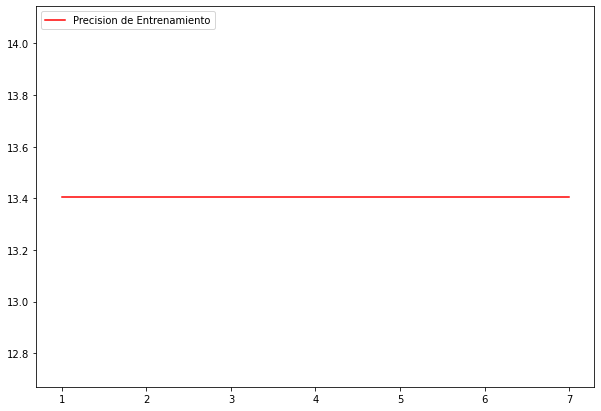

In [ ]:
plt.figure(figsize=(10,7))

plt.plot(np.array(epocas_totales_rnn), np.array(prec_train_totales_rnn)*100, color = "red")
plt.legend(['Precision de Entrenamiento'], loc='upper left')
plt.show()

## Gráfico 4: Val Precision en función de épocas.



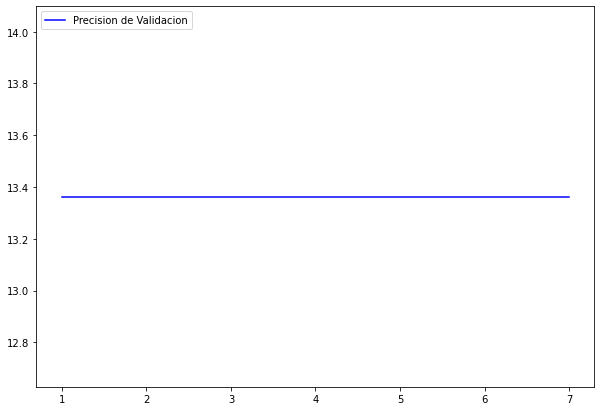

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(np.array(epocas_totales_rnn), np.array(prec_val_totales_rnn)*100, color = "blue")
plt.legend(['Precision de Validacion'], loc='upper left')
plt.show()


## Desempeño de red en el test set

In [ ]:
rnn_model.eval()
output_train, _ = rnn_model(input_seq_train)

pred_train = calcular_predicciones(output_train)
prec_train = calcular_precicision(pred_train, label_train)
print("Precisión en el train set: ", round(prec_train*100, 2))


rnn_model.eval()
output_val, _ = rnn_model(input_seq_val)

pred_val = calcular_predicciones(output_val)
prec_val = calcular_precicision(pred_val, label_val)
print("Precisión en el val set: ", round(prec_val*100, 2))

rnn_model.eval()
output_test, _ = rnn_model(input_seq_test)

pred_test = calcular_predicciones(output_test)
prec_test = calcular_precicision(pred_test, label_test)
print("Precisión en el test set: ", round(prec_test*100, 2))


batch_size 3901
Precisión en el train set:  13.41
batch_size 1115
Precisión en el val set:  13.36
batch_size 558
Precisión en el test set:  13.44


comente brevemente sobre un eventual overfitting en las redes entrenadas y sobre la capacidad de generalizar de las mismas.


## Test mensajes fijos

In [ ]:
msge_1 = 'Hi Rodrigo! How are you? I hope you very well. Hey dude I invite you to my party!'
msge_2 = 'SUPPORT CHILE !! Send a message to 3311 with the word " Chile " to show your support to your football selection'

input_seq_mgs1 = get_mean_vector(msge_1.lower().split())
input_seq_mgs1 = pd.array([input_seq_mgs1])

input_seq_mgs2 = get_mean_vector(msge_2.lower().split())
input_seq_mgs2 = pd.array([input_seq_mgs2])


rnn_model.eval()

input_seq_mgs1 = one_hot_encode(input_seq_mgs1, dict_size)
input_seq_mgs1 = torch.from_numpy(input_seq_mgs1)
input_seq_mgs1 = input_seq_mgs1.to(device)

output_val, _ = rnn_model(input_seq_mgs1)

pred_val = calcular_predicciones(output_val)[0]
print("message: ", msge_1)
pred_val = "SPAM" if pred_val == 1 else "NOT SPAM"
print("Predicted as: ", pred_val, "\n")
# prec_val = calcular_precicision(pred_val, label_val)
# print("Precisión en el val set: ", round(prec_val*100, 2))

rnn_model.eval()

input_seq_mgs2 = one_hot_encode(input_seq_mgs2, dict_size)
input_seq_mgs2 = torch.from_numpy(input_seq_mgs2)
input_seq_mgs2 = input_seq_mgs2.to(device)

output_val, _ = rnn_model(input_seq_mgs2)

pred_val = calcular_predicciones(output_val)[0]
print("message: ", msge_2)
pred_val = "SPAM" if pred_val == 1 else "NOT SPAM"
print("Predicted as: ", pred_val)
# prec_val = calcular_precicision(pred_val, label_val)
# print("Precisión en el val set: ", round(prec_val*100, 2))

batch_size 1
message:  Hi Rodrigo! How are you? I hope you very well. Hey dude I invite you to my party!
Predicted as:  NOT SPAM 

batch_size 1
message:  SUPPORT CHILE !! Send a message to 3311 with the word " Chile " to show your support to your football selection
Predicted as:  NOT SPAM


# Entrenamiento GRU

In [ ]:
gru_model = Model(input_size=1, output_size=2, hidden_dim=350, n_layers=1, device = device, dict_size = dict_size)
gru_model = gru_model.to(device)

## Gráfico 1: Train Loss en función de épocas

In [ ]:
loss_train_totales_rnn = torch.tensor(loss_train_totales_rnn, device = 'cpu')
loss_val_totales_rnn = torch.tensor(loss_val_totales_rnn, device = 'cpu')

plt.figure(figsize=(10,7))
plt.plot(epocas_totales_rnn, loss_train_totales_rnn, color = "red")
plt.plot(epocas_totales_rnn, loss_val_totales_rnn, color = "blue")
plt.legend(['Perdida de Entrenamiento', 'Perdida de Validacion'], loc='upper left')

plt.show()

## Gráfico 2: Train Loss en función de épocas (log)


## Gráfico 3: Train Precision en función de las épocas.


## Gráfico 4: Val Precision en función de épocas.



## Gráfico 1: Train Loss en función de épocas


# Entrenamiento LSTM

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
lstm_model = LSTM_model(input_size=80, output_size=2, hidden_dim=20, n_layers=1, device = device)
lstm_model = lstm_model.to(device)

In [ ]:
n_epochs = 47
lr=0.01*2

# Define Loss, Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=lr)

In [ ]:
# Entrenamiento

epocas_totales_lstm = []
loss_train_totales_lstm = []
loss_val_totales_lstm = []
prec_train_totales_lstm = []
prec_val_totales_lstm = []

for epoch in range(1, n_epochs + 1):

  start = time.time()

  lstm_model.train()

  optimizer.zero_grad() # Clears existing gradients from previous epoch

  output_train, _ = lstm_model(input_seq_train)
  loss_train = criterion(output_train, target_seq_train.view(-1).long())
  loss_train.backward() # Does backpropagation and calculates gradients
  optimizer.step() # Updates the weights accordingly

  lstm_model.eval()
  output_val, _ = lstm_model(input_seq_val)

  pred_train = calcular_predicciones(output_train)
  pred_val = calcular_predicciones(output_val)

  prec_train = calcular_precicision(pred_train, label_train)
  prec_val = calcular_precicision(pred_val, label_val)

  loss_val = criterion(output_val, target_seq_val.view(-1).long())

  epocas_totales_lstm.append(epoch)
  loss_train_totales_lstm.append(loss_train)
  loss_val_totales_lstm.append(loss_val)
  prec_train_totales_lstm.append(prec_train)
  prec_val_totales_lstm.append(prec_val)

  end = time.time()

  print('Epoch: {}/{}.............'.format(epoch, n_epochs), end=' ')
  print("Loss Train Epoch: {:.4f}.............".format(loss_train.item()), end =' ')
  print("Time Epoch: {}".format(end-start))

Epoch: 1/47............. Loss Train Epoch: 0.5686............. Time Epoch: 0.4878373146057129
Epoch: 2/47............. Loss Train Epoch: 0.5104............. Time Epoch: 0.4737875461578369
Epoch: 3/47............. Loss Train Epoch: 0.4858............. Time Epoch: 0.46782946586608887
Epoch: 4/47............. Loss Train Epoch: 0.4730............. Time Epoch: 0.46402478218078613
Epoch: 5/47............. Loss Train Epoch: 0.4638............. Time Epoch: 0.4610919952392578
Epoch: 6/47............. Loss Train Epoch: 0.4580............. Time Epoch: 0.46564555168151855
Epoch: 7/47............. Loss Train Epoch: 0.4544............. Time Epoch: 0.4630007743835449
Epoch: 8/47............. Loss Train Epoch: 0.4525............. Time Epoch: 0.4713304042816162
Epoch: 9/47............. Loss Train Epoch: 0.4509............. Time Epoch: 0.4606022834777832
Epoch: 10/47............. Loss Train Epoch: 0.4499............. Time Epoch: 0.4602491855621338
Epoch: 11/47............. Loss Train Epoch: 0.4494......

RuntimeError: ignored

## Gráfico 1: Train Loss en función de épocas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


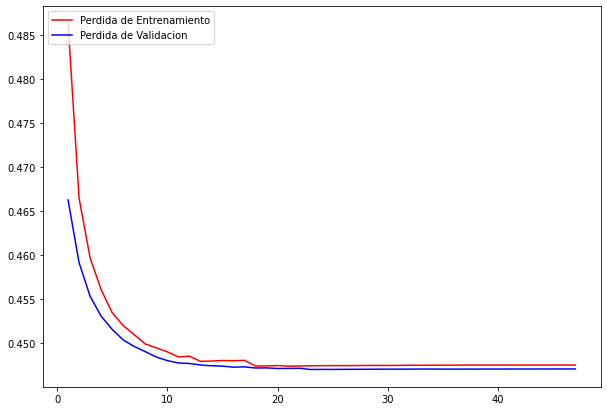

In [ ]:
loss_train_totales_lstm = torch.tensor(loss_train_totales_lstm, device = 'cpu')
loss_val_totales_lstm = torch.tensor(loss_val_totales_lstm, device = 'cpu')

plt.figure(figsize=(10,7))
plt.plot(epocas_totales_lstm, loss_train_totales_lstm, color = "red")
plt.plot(epocas_totales_lstm, loss_val_totales_lstm, color = "blue")
plt.legend(['Perdida de Entrenamiento', 'Perdida de Validacion'], loc='upper left')

plt.show()

## Gráfico 2: Train Loss en función de épocas (log)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


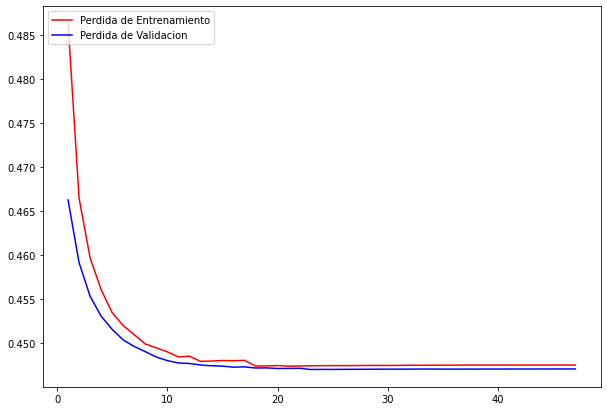

In [ ]:
loss_train_totales_lstm = torch.tensor(loss_train_totales_lstm, device = 'cpu')
loss_val_totales_lstm = torch.tensor(loss_val_totales_lstm, device = 'cpu')

plt.figure(figsize=(10,7))
plt.plot(epocas_totales_lstm, loss_train_totales_lstm, color = "red")
plt.plot(epocas_totales_lstm, loss_val_totales_lstm, color = "blue")
plt.legend(['Perdida de Entrenamiento', 'Perdida de Validacion'], loc='upper left')

plt.show()

## Gráfico 3: Train Precision en función de épocas

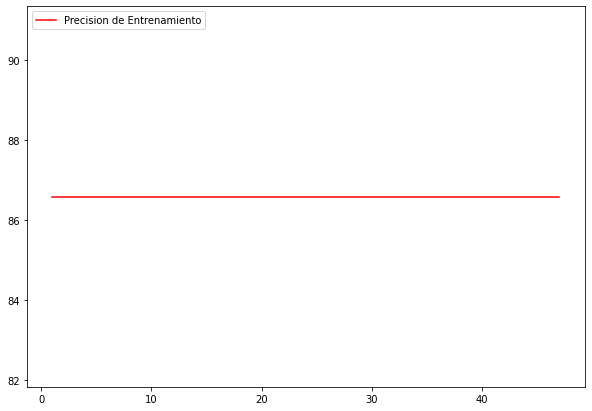

In [ ]:
plt.figure(figsize=(10,7))

plt.plot(np.array(epocas_totales_lstm), np.array(prec_train_totales_lstm)*100, color = "red")
plt.legend(['Precision de Entrenamiento'], loc='upper left')
plt.show()

## Gráfico 4: Val Precision en función de épocas

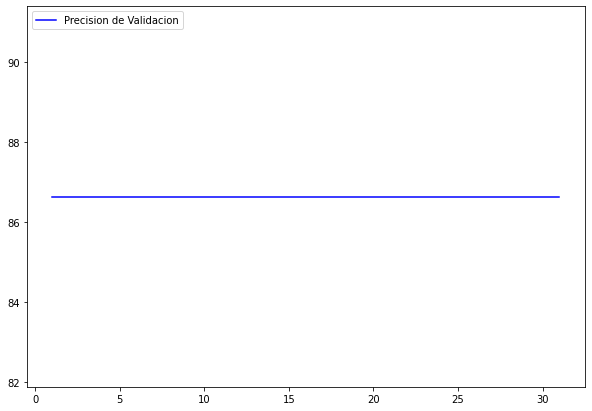

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(np.array(epocas_totales_lstm), np.array(prec_val_totales_lstm)*100, color = "blue")
plt.legend(['Precision de Validacion'], loc='upper left')
plt.show()


## Desempeño de red en el set de test

In [ ]:
lstm_model.eval()
output_train, _ = lstm_model(input_seq_train)

pred_train = calcular_predicciones(output_train)
prec_train = calcular_precicision(pred_train, label_train)
print("Precisión en el train set: ", round(prec_train*100, 2))


lstm_model.eval()
output_val, _ = lstm_model(input_seq_val)

pred_val = calcular_predicciones(output_val)
prec_val = calcular_precicision(pred_val, label_val)
print("Precisión en el val set: ", round(prec_val*100, 2))

lstm_model.eval()
output_test, _ = lstm_model(input_seq_test)

pred_test = calcular_predicciones(output_test)
prec_test = calcular_precicision(pred_test, label_test)
print("Precisión en el test set: ", round(prec_test*100, 2))


Precisión en el train set:  86.59
Precisión en el val set:  86.64
Precisión en el test set:  86.56


# Entrenamiento LSTM Bidirectional

In [ ]:
lstm_model = LSTM_model(input_size=80, output_size=2, hidden_dim=20, n_layers=1, device = device)
lstm_model = lstm_model.to(device)

## Gráfico 1: Train Loss en función de épocas

## Gráfico 2: Train Loss en función de épocas (log)

## Gráfico 3: Train Precision en función de épocas

## Gráfico 4: Val Precision en función de épocas.

## Desempeño de red en el set de test

# **Actividad 5**
AC04 pero con dos capas ocultas

### Entrenamiento RNN

In [ ]:
rnn_model = Model(input_size=1, output_size=2, hidden_dim=350, n_layers=2, device = device, dict_size = dict_size)
rnn_model = rnn_model.to(device)

### Entrenamiento GRU

### Entrenamiento LSTM

### Entrenamiento LSTM-Bi

# **Actividad 6**

# Transformer HuggingFace

In [ ]:
! pip install transformers datasets

from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("sureshs/distilbert-large-sms-spam")

model = AutoModelForSequenceClassification.from_pretrained("sureshs/distilbert-large-sms-spam")

In [ ]:
msge_1 = 'Hi Rodrigo! How are you? I hope you very well. Hey dude I invite you to my party!'
msge_2 = 'SUPPORT CHILE !! Send a message to 3311 with the word " Chile " to show your support to your football selection'

inputs = tokenizer(msge_1, add_special_tokens=False, return_tensors="pt")
with torch.no_grad():
  logits = model(**inputs).logits

predicted_token_class_ids = logits.argmax(-1)
model.config.id2label[predicted_token_class_ids.detach().numpy()[0]] 

'not spam'

In [ ]:
msge_2 = 'SUPPORT CHILE !! Send a message to 3311 with the word " Chile " to show your support to your football selection'

inputs = tokenizer(msge_2, add_special_tokens=False, return_tensors="pt")
with torch.no_grad():
  logits = model(**inputs).logits

predicted_token_class_ids = logits.argmax(-1)
model.config.id2label[predicted_token_class_ids.detach().numpy()[0]] 

'spam'

In [ ]:
results = []
for index, row in TEST_DB.iterrows():
  msg = row["message"]
  lbl = row["label"]
  if lbl == "ham":
    lbl = "not spam"
  inputs = tokenizer(msg, add_special_tokens=False, return_tensors="pt")
  with torch.no_grad():
    logits = model(**inputs).logits

  predicted_token_class_ids = logits.argmax(-1)
  curr_result = model.config.id2label[predicted_token_class_ids.detach().numpy()[0]]
  curr_result = 1 if curr_result == lbl else 0
  results.append(curr_result)

print("accuracy", sum(results)/len(results))

accuracy 0.9982078853046595


Vemos que el transformer funciona mucho mejor que nuestros modelos.

Antes de la introducción de Transformer, la mayoría de los modelos de PNL de última generación se basaban en RNN. La RNN procesa los datos de forma secuencial, palabra por palabra, para acceder a la celda de la última palabra. La RNN no es muy eficiente en el manejo de secuencias largas. El modelo tiende a olvidar el contenido de la posición más lejana o, en algunos casos, mezcla el contenido de las posiciones adyacentes: cuanto más largos son los pasos, más difícil es para la red recurrente tomar decisiones. La naturaleza secuencial de las RNN dificulta aún más el aprovechamiento de los modernos dispositivos de cálculo rápido, como las TPU y las GPU.

La memoria a largo plazo (LSTM) ofrece una ligera mejora respecto a las RNN convencionales. La LSTM aprovecha el mecanismo de la puerta para determinar qué información debe recordar la célula y cuál debe olvidar. También puede eliminar el problema del gradiente de fuga del que adolecen las RNN. La LSTM es buena, pero no lo suficientemente buena. Al igual que las RNN, las LSTM no pueden entrenarse en paralelo.

Los Perceptrones Multicapa (MLP) son una red neuronal básica, que fue muy popular en los años ochenta. Sin embargo, ha quedado desfasada para cualquier trabajo pesado en comparación con redes como CNN o RNN.

Las redes neuronales convolucionales tienen una ventaja sobre las RNN (y las LSTM), ya que son fáciles de paralelizar. Las CNN tienen una amplia aplicación en PNL, ya que son rápidas de entrenar y son eficaces con frases cortas. Captan las dependencias entre todas las posibles combinaciones de palabras. Sin embargo, en las frases largas, capturar las dependencias entre las diferentes combinaciones de palabras puede ser engorroso y poco práctico.

Transformer evita la recursividad procesando las frases en su conjunto mediante mecanismos de atención e incrustación posicional. Los modelos más recientes, como Transformer-XL, también pueden superar los problemas de tamaño de la entrada fija.

# ----------- Segunda parte -----------

In [ ]:
import re
import nltk
import math
import torch
import torchtext
import numpy as np
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns
import torch.nn as nn
nltk.download('stopwords')
import matplotlib.pyplot as plt
from torchtext.vocab import GloVe
from nltk.corpus import stopwords
from torchtext import data, datasets
from collections import defaultdict, Counter
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Actividad 7**

In [ ]:
import gensim.downloader

In [ ]:
glove_vectors = gensim.downloader.load('word2vec-google-news-300')

In [ ]:
path = '/content/drive/MyDrive/HW2DL/Tarea_2_DL_2022_1/Redes Neuronales Recurrentes (Parte 2)/SICK.txt'

In [ ]:
with open(path) as file:
  data = file.readlines()

### Limpiar la data (signos y mayusculas)

### Conectarnos a la GPU

In [ ]:
# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")    
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

# **Actividad 8**

In [ ]:
class SIAMESE(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers, embedding_size, device, m):
        super(SIAMESE, self).__init__()

        self.m = m

        self.input_size = input_size
        self.output_size = output_size
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        self.embedding_size = embedding_size

        self.device = device

        self.lstm_1 = 
        self.lstm_2 = 

        self.flatten = 
    
    def forward():

        return out_final
    
    def init_hidden(self, batch_size):
        h = torch.zeros(self.n_layers, batch_size, self.hidden_dim)
        return h.to(self.device)

In [ ]:
def pair_rkg_loss(out_1, out_2, y, m):
  total_loss = 0
  total_loss = torch.tensor(total_loss)
  total_loss.to(device)

  for i in range(len(out_1)):
    o_1 = out_1[i]
    o_2 = out_2[i]

    dist = torch.norm(o_1 - o_2)
    
    loss = y[i]*dist + (1-y[i])*max(0, (m-dist))

    total_loss = total_loss + loss
  
  total_loss = total_loss/len(out_1)

  return total_loss.to(device)

  
class SIAMESE_model(nn.Module):
  def __init__(self, input_size, hidden_dim, n_layers, device):
    super(SIAMESE_model, self).__init__()

    self.hidden_dim = hidden_dim
    self.n_layers = n_layers

    self.lstm_1 = nn.LSTM(input_size, hidden_dim, n_layers, batch_first=True)

    self.lstm_2 = nn.LSTM(input_size, hidden_dim, n_layers, batch_first=True)

    self.device = device

  def forward(self, x):   
    batch_size = int(x.size(0)/2)

    h_1 = self.init_hidden(batch_size)
    c_1 = self.init_hidden(batch_size)

    h_2 = self.init_hidden(batch_size)
    c_2 = self.init_hidden(batch_size)

    input_A = x[0:int(len(x)/2)]
    input_B = x[int(len(x)/2): len(x)]

    input_A.to(self.device)
    input_B.to(self.device)

    out_1, (h_1, c_1) = self.lstm_1(input_A, (h_1, c_1))

    out_2, (h_2, c_2) = self.lstm_2(input_B, (h_2, c_2))
    
    return out_1.to(self.device), out_2.to(self.device), (h_1.to(self.device), c_1.to(self.device)), (h_2.to(self.device), c_2.to(self.device))

  def init_hidden(self, batch_size):
    hidden = torch.zeros((self.n_layers, batch_size, self.hidden_dim))
    return hidden.to(self.device)



def regresion_mse(out_1, out_2, score):
  distancias = []
  z = []
  for i in range(len(out_1)):
    x_A = out_1[i]
    x_B = out_2[i]
    dist = torch.norm(x_A-x_B)
    distancias.append(dist)
    z.append(math.exp(-dist))

  z = np.array(z).reshape(-1,1)

  regresion_lineal = LinearRegression()
  regresion_lineal.fit(z, np.array(score))

  alpha = regresion_lineal.coef_[0]
  beta = regresion_lineal.intercept_

  mse = 0
  mabs = 0

  for i in range(len(z)):
    pred = alpha*z[i] + beta
    real = score[i]
    mse_iter = (real-pred)**2
    mse = mse + mse_iter
    mabs_iter = abs(real-pred)
    mabs = mabs + mabs_iter
  
  mabs = mabs/len(z)
  mse = mse/len(z)

  return mse, mabs, alpha, beta


def regresion_mse_dado(out_1, out_2, score, alpha, beta):
  distancias = []
  z = []

  for i in range(len(out_1)):
    x_A = out_1[i]
    x_B = out_2[i]
    dist = torch.norm(x_A-x_B)
    distancias.append(dist)
    z.append(math.exp(-dist))

  z = np.array(z).reshape(-1,1)

  mse = 0
  mabs = 0

  for i in range(len(z)):
    pred = alpha*z[i] + beta
    real = score[i]
    mse_iter = (real-pred)**2
    mse = mse + mse_iter
    mabs_iter = abs(real-pred)
    mabs = mabs + mabs_iter
  
  mabs = mabs/len(z)
  mse = mse/len(z)

  return mse, mabs


model = SIAMESE_model(300, 50, 1, device)
model.to(device)

n_epochs = 100
lr = 0.01
m = 5  

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [ ]:
# Entrenamiento

epocas_totales = []

loss_train_totales = []
loss_val_totales = []

prec_train = []
prec_val = []

for epoch in range(1, n_epochs + 1):

  start = time.time()

  model.train()

  optimizer.zero_grad() # Clears existing gradients from previous epoch

  out_1, out_2, _, _ = model(input_seq_train)

  loss_train = pair_rkg_loss(out_1, out_2, y_train, m)

  loss_train.backward() # Does backpropagation and calculates gradients

  reg_train = regresion_mse(out_1, out_2, scores_train)

  prec_train_epoch = reg_train[0:2]

  alpha_train = reg_train[2]
  beta_train = reg_train[3]

  #------------------------------

  for w1, w2 in zip(model.lstm_1.parameters(), model.lstm_2.parameters()):
    w1.grad.data.add_(w2.grad.data)
    w2.grad = None

  #------------------------------

  optimizer.step() # Updates the weights accordingly

  #------------------------------

  for w1, w2 in zip(model.lstm_1.parameters(), model.lstm_2.parameters()):
    w2.data.copy_(w1.data)

  #------------------------------

  model.eval()

  out_1_val, out_2_val, _, _ = model(input_seq_val)
  loss_val = pair_rkg_loss(out_1_val, out_2_val, y_val, m)

  prec_val_epoch = regresion_mse_dado(out_1_val, out_2_val, scores_val, alpha_train, beta_train)

  epocas_totales.append(epoch)

  prec_train.append(prec_train_epoch)
  prec_val.append(prec_val_epoch)

  loss_train_totales.append(loss_train)
  loss_val_totales.append(loss_val)

  end = time.time()

  print('Epoch: {}/{}.............'.format(epoch, n_epochs), end=' ')
  print("Loss Train Epoch: {:.4f}.............".format(loss_train.item()), end =' ')
  print("Time Epoch: {}".format(end-start))  

In [ ]:
plt.figure(figsize=(10,7))

loss_train_totales = torch.tensor(loss_train_totales, device = 'cpu')
loss_val_totales = torch.tensor(loss_val_totales, device = 'cpu')

plt.plot(epocas_totales, loss_train_totales, color = "red")
plt.plot(epocas_totales, loss_val_totales, color = "blue")
plt.legend(['Perdida de Entrenamiento', 'Perdida de Validación'], loc='upper left')

plt.show()

In [ ]:
plt.figure(figsize=(10,7))

plt.plot(epocas_totales[0:], np.array(prec_train)[:, 0], color = "red")
plt.plot(epocas_totales[0:], np.array(prec_val)[:, 0], color = "blue")
plt.legend(['Precisión de Entrenamiento mse', 'Precisión de Validación mse'], loc='upper left')

plt.show()

In [ ]:
plt.figure(figsize=(10,7))

plt.plot(epocas_totales[0:], np.array(prec_train)[:, 1], color = "red")
plt.plot(epocas_totales[0:], np.array(prec_val)[:, 1], color = "blue")
plt.legend(['Precisión de Entrenamiento abs', 'Precisión de Validación abs'], loc='upper left')

plt.show()

In [ ]:
input_size = 1
output_size = 10
hidden_dim = 40
n_layers = 2
embedding_size = 300
m = 5

sia = SIAMESE(input_size, output_size, hidden_dim, n_layers, embedding_size, device, m)

In [ ]:
sia = sia.to(device)

# **Actividad 9**

In [ ]:
lr = 0.001
n_epochs = 20

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(sia.parameters(), lr=lr)

In [ ]:
for epoch in range(1, n_epochs + 1):

  sia.train()

  for batch in set_train:

    # Backpropagation

    loss_train_batch.backward()
    optimizer.step()

    #---------------------------------------------------------------------

  #---------------------------------------------------------------------

  #---------------------------------------------------------------------


  #---------------------------------------------------------------------
  
  end_epoch = time.time()

  print('Epoch: {}/{}.............'.format(epoch, n_epochs), end=' ')
  print("Loss Train Epoch: {:.4f}.............".format(loss_train_epoch), end =' ')
  print("Time Epoch: {}".format(round(end_epoch - start_epoch, 2))) 

### Grafico de perdida para el set de entrenamiento

# **Actividad 10**

Ahora lo que haremos será aplicar la función $ f(I) $ a todos los textos del set de validación. 

### Grafico de los puntos

# **Actividad 11**

### Comentarios

# Fin segunda parte